# Final Project

In [1]:
print("我準備好了")


我準備好了


In [2]:
import auto_update
#記得要去三大法人爬蟲更新籌碼面指標

twse_divide_ratio -- 資料日期
twse_divide_ratio -- 股票代號
twse_divide_ratio -- 股票名稱
twse_divide_ratio -- 除權息前收盤價
twse_divide_ratio -- 除權息參考價
twse_divide_ratio -- 權值+息值
twse_divide_ratio -- 權/息
twse_divide_ratio -- 漲停價格
twse_divide_ratio -- 跌停價格
twse_divide_ratio -- 開盤競價基準
twse_divide_ratio -- 減除股利參考價
twse_divide_ratio -- 詳細資料
twse_divide_ratio -- 最近一次申報資料 季別/日期
twse_divide_ratio -- 最近一次申報每股 (單位)淨值
twse_divide_ratio -- 最近一次申報每股 (單位)盈餘
twse_divide_ratio -- twse_divide_ratio


JSONDecodeError: Extra data: line 1 column 1286171 (char 1286170)

### 獲取歷史資料

## 要計算日期和更新資料

In [18]:
from finlab.data import Data
from finlab_old.data import Data as data1
import pandas as pd
import sqlite3
import os
import numpy as np
import datetime
import numpy as np
from finlab import ml
import pandas_profiling
conn = sqlite3.connect(os.path.join('data', 'data.db'))
pd = pd.read_sql('select * from legal_person',conn,index_col = ['date'])
## 上面沒有整理

data1 = data1()


data = Data()

big = data1.get('三大法人買賣超股數',10000000).fillna(0)
#big0 = data1.get('外陸資買賣超股數(不含外資自營商)',10000000).fillna(0)
#le0 = data1.get('外資買進股數',10000000).fillna(0)
#le1 = data1.get('投信買進股數',10000000).fillna(0)
#le3 = data1.get('三大法人買超股數',10000000).fillna(0)
#bigm = big.rolling(3).sum()
rev = data.get("當月營收")
close = data.get("收盤價")
pbe = data.get('股價淨值比')
pe = data.get('本益比')
rev.index = rev.index.shift(5, "d")
#取決於幾號買賣
#total = big0+big
#q = ml.fundamental_features()
#a = q>0
#free_m_ratio = q["R205_現金流量比率"]
#twii= data.get("發行量加權股價指數")

In [4]:
close.tail()

stock_id,0015,0050,0051,0052,0053,0054,0055,0056,0057,0058,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2019-11-13,NaN,91.45,35.34,66.5,41.04,24.66,19.57,27.79,58.15,48.81,...,17.20,45.80,25.95,11.70,15.50,91.5,17.75,74.2,30.95,10.05
2019-11-14,NaN,91.40,35.03,66.1,40.90,24.60,19.55,27.83,58.10,48.60,...,17.10,48.30,25.50,11.75,15.45,90.0,17.50,72.5,31.10,10.10
2019-11-15,NaN,92.30,35.30,67.1,41.24,24.70,19.55,27.88,58.60,48.80,...,17.10,48.15,25.75,11.75,14.90,92.0,17.60,72.8,30.60,10.00
2019-11-18,NaN,92.90,35.48,67.7,41.48,24.81,19.60,28.05,58.85,48.91,...,17.25,47.65,27.90,11.70,14.05,91.2,17.60,72.1,30.60,10.05
2019-11-19,NaN,93.60,35.53,68.3,41.81,24.98,19.59,28.14,59.00,49.16,...,17.25,47.40,28.10,11.70,14.15,93.9,17.60,72.3,31.45,10.05


### 計算features

In [19]:
def legal(n):
    legal = big.rolling(n,min_periods=1).sum()
    #legal = legal.replace([np.inf, -np.inf], np.nan).fillna(0)
    return legal

def SMA(n):
    return close.rolling(n, min_periods=1).mean()/n

def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

features = {
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    "SMA5":SMA(5),
    "SMA10":SMA(10),
    "SMA20":SMA(20),
    "SMA60":SMA(60),
    "SMA120":SMA(120),
    "SMA240":SMA(240),
    'pe':pe,
    'pbe':pbe,
}
 #  'legal5':legal(5),
 #  'legal10':legal(10),
 #  'legal20':legal(20),
 #  'legal60':legal(60),
 #  'legal120':legal(120),
 #  'legal240':legal(240),
  #  'rsv5': rsv(5),
  #  'rsv10': rsv(10),
  #  'rsv20': rsv(20),
  #  'rsv60': rsv(60),
  #  'rsv120': rsv(120),
  #  'rsv240': rsv(240),
   # 'big1':big1,
   # 'big2':big2,
   # 'big3':big3,

### 製作dataset

##### 設定買賣頻率

In [20]:
every_month = rev.index
every_month
every_day = close.index
every_day

DatetimeIndex(['2007-04-23', '2007-04-24', '2007-04-25', '2007-04-26',
               '2007-04-27', '2007-04-30', '2007-05-02', '2007-05-03',
               '2007-05-04', '2007-05-07',
               ...
               '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-11',
               '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='date', length=3111, freq=None)

##### 將dataframe 組裝起來

In [21]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')


for name, f in features.items():
    features[name] = f.unstack()

import pandas as pd
dataset = pd.DataFrame(features)

feature_names = list(dataset.columns)

import sklearn.preprocessing as preprocessing
from finlab import ml
ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)
dataset_scaled = pd.DataFrame(preprocessing.scale(dataset),index = dataset.index , columns = dataset.columns)
dataset_scaled["return"] = dataset["return"]
dataset_scaled["rank"] = dataset["rank"]

print(dataset.shape)

dataset = ml.drop_extreme_case(dataset_scaled, 
    ['bias60', 'bias120', 'bias240', 'mom1', 'mom2', 'mom3', 'mom4', 'mom5', 'mom6']
                               ,thresh=0.01)

print(dataset.shape)

dataset_dropna = dataset.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

dataset_train = dataset_dropna[:'2017']
dataset_test = dataset_dropna['2018':]

(344430, 31)
(322262, 31)


### 神經網路模型

In [22]:
import keras
from keras.initializers import he_normal
import os
from keras.layers.advanced_activations import LeakyReLU, PReLU
os.environ['KMP_DUPLICATE_LIB_OK']='True'
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=he_normal(seed=0)))

model.add(keras.layers.Dense(100, activation='relu',
                      kernel_initializer=he_normal(seed=0)))
model.add(keras.layers.Dropout(0.9))
model.add(keras.layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              metrics=['accuracy'],
              optimizer="adam",)
model.load_weights("model.weight", by_name=False)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 13,201
Trainable params: 13,201
Non-trainable params: 0
_________________________________________________________________


### lightgbm Model

In [23]:
import lightgbm as lgb
cf = lgb.LGBMRegressor(n_estimators=500)
cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## xgboost

In [ ]:
#import xgboost

#cf2 = xgboost.XGBRegressor(n_estimators=100)

#cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

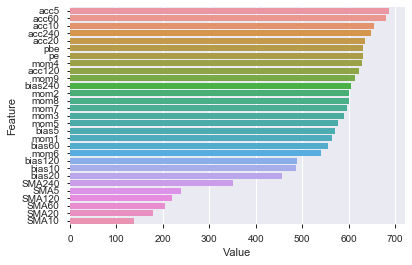

In [25]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

### Ensemble learning

In [26]:
vals = model.predict(dataset_test[feature_names].astype(float))
dataset_test['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_test.index)

vals = cf.predict(dataset_test[feature_names].astype(float))
dataset_test['result2'] = pd.Series(vals, dataset_test.index)

vals = cf2.predict(dataset_test[feature_names].astype(float))
dataset_test['result3'] = pd.Series(vals, dataset_test.index)

C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

## 原本的

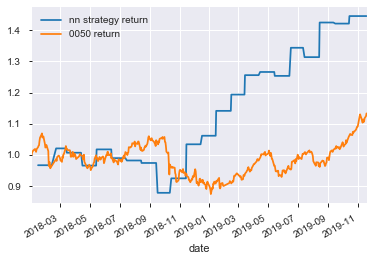

In [27]:
import math


dates = sorted(list(set(dataset_test.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_test.loc[d]
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates).cumprod()

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()

stock_id  date      
1109      2019-11-15    1.804579
2204      2019-11-15    1.781716
2367      2019-11-15    1.867403
2414      2019-11-15    1.763302
2427      2019-11-15    1.770423
2458      2019-11-15    1.835405
2459      2019-11-15    1.796736
2643      2019-11-15    1.756693
2885      2019-11-15    1.767821
2889      2019-11-15    1.772847
3010      2019-11-15    1.780370
3030      2019-11-15    1.800720
3533      2019-11-15    1.760238
4552      2019-11-15    1.806522
5403      2019-11-15    1.813181
6189      2019-11-15    1.780246
8103      2019-11-15    1.786403
9904      2019-11-15    1.793821
9943      2019-11-15    1.786262
9945      2019-11-15    1.762516
dtype: float64

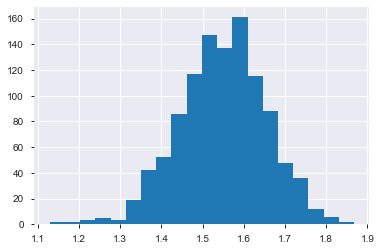

In [28]:
# get the latest dataset

last_date = dataset.index.levels[1].max()
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


# remove NaN testcases

#print("Some stocks are skipped due to NaN")
#print(last_dataset[last_dataset[feature_names].isnull().sum(axis=1) != 0].index.get_level_values("stock_id").values)
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)

# calculate score

rank = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']
condition = (rank >= rank.nlargest(20).iloc[-1]) 

# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
rank[condition]

## 添加三大反人條件

1.9661278330363936


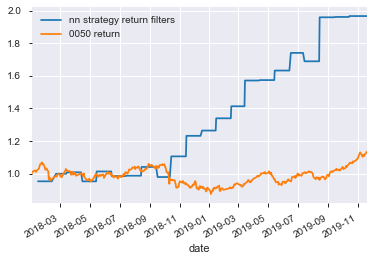

In [29]:
#(外資+投信+自營商-外資借券).rolling(N1).sum()
#每月15號選出rank前(N2)的股票進行買入
# N1天內法人的增加張數要超過N3張
def leg(n1,n3):
    condition1 = big.rolling(n1).sum() >n3*1000
    return condition1

def rs1(n1,n2,n3):
    import pandas as pd
    dates = sorted(list(set(dataset_test.index)))
    rs = []
    for d in dates:
        
        
        dataset_time = dataset_test.loc[d]
        rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
            
        condition = (rank >= rank.nlargest(n2).iloc[-1]) 
        #r = dataset_time['return'][condition].mean()
            # 開始蝦七八亂改
        rk = dataset_time[condition]['stock_id']
        rd = []
        for n in rk:
            rd.append(n)
    
    #condition1 = big.rolling(n1).sum() >n3*1000
        condition1 = leg(n1,n3)
        #condition1 = lambda x:big.rolling(n1).sum() > n3*1000
        con = pd.DataFrame(condition1.unstack()[rd])
    #con1 = con.pivot_table(index="stock_id",columns="date")
        con0 = con.pivot_table(index="date",columns="stock_id")
        con01 = con0.reindex(every_month, method='ffill').dropna()
        con02 = con01.loc[d][0]
        con03 = con02[con02]
        con04=[]
        for i in con03.index:
            con04.append(i)
            
        test = dataset_time.reset_index().set_index("stock_id")
        lo = test["return"][con04].mean()
        #lo = lo.dropna()
        
         #結束蝦七八亂改
        rs.append(lo * (1-3/1000-1.425/1000*2*0.6))
            
    rs = pd.Series(rs, index=dates).cumprod()
    return rs,con04,condition

#(68,20,11),(38,17,4)
# 參數尚未最佳化
rs_legal,l,condition_legal = rs1(68,20,11)
rs_legal = pd.Series(rs_legal, index=dates)

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return filters':rs_legal.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()

print(rs_legal[-1])

In [30]:
from cmoney import VirtualStockAccount
vs = VirtualStockAccount('0962041028','f8859373')

['aid=580762', 'aid=']
accounts ['580762']
current account 580762


In [31]:
def auto_buy(position, lowest_fee=20, discount=1, add_cost=10, money=100000):
    from cmoney import VirtualStockAccount
    vs = VirtualStockAccount('0962041028','f8859373')
    # get total money
    print('total money', money)

    # get price of the stock
    import time
    infos = {}
    if isinstance(position, pd.Series):
        slist = position[(position != 0)].index.tolist()
    elif isinstance(position, list):
        slist = position
    else:
        raise Exception("type of position should be pd.Series or list")

    for sid in slist:
        print(sid)
        infos[sid] = vs.get_price(sid) # RefPrice
        time.sleep(2)

    # format dataframe and series
    price = pd.Series({sid:info['StockInfo']['RefPrice'] for sid, info in infos.items() if info is not None})
    none_stock_ids = [sid for sid, info in infos.items() if info is None]
    if none_stock_ids:
        print('**WARRN: there are stock cannot find info', none_stock_ids)

    stock_list = price.dropna().transpose()

    # rebalance stocks
    while (money / len(stock_list)) < (lowest_fee - add_cost) * 1000 / 1.425 / discount:
        stock_list = stock_list.loc[stock_list != stock_list.max()]

    while True:
        invest_amount = (money / len(stock_list))
        ret = np.floor(invest_amount / stock_list / 1000)

        if (ret == 0).any():
            stock_list = stock_list.loc[stock_list != stock_list.max()]
        else:
            break

    slist = ret.to_dict()
    return vs.rebalance(slist)

In [32]:
auto_buy(l)

['aid=580762', 'aid=']
accounts ['580762']
current account 580762
total money 100000
1339
2352
5434
6189
buy  1103 -2.0
buy  1504 -1.0
buy  2352 2.0
buy  2427 -1.0
buy  6189 1.0


In [33]:
def record(date):
    for i in range(0, len(vs.get_orders()),1):
        stock_id = vs.get_orders()[i]['Id']
        stock_number = vs.get_orders()[i]['OrdQty']
        print('date=%s, id=%s : num=%s'%(date,stock_id,stock_number))
        with open('buy_time.txt','a') as f:
            f.writelines('date=%s, id=%s : num=%s'%(date,stock_id,stock_number))

In [34]:
#輸入日期
record('2019-11-18')

date=2019-11-18, id=6189 : num=1
date=2019-11-18, id=2427 : num=1
date=2019-11-18, id=2352 : num=2
date=2019-11-18, id=1504 : num=1
date=2019-11-18, id=1103 : num=1
date=2019-11-18, id=3622 : num=1
date=2019-11-18, id=3049 : num=1
date=2019-11-18, id=2427 : num=1
date=2019-11-18, id=1615 : num=1
date=2019-11-18, id=1504 : num=1
date=2019-11-18, id=1103 : num=2


In [6]:
vs.sync(['1101', '2330'])

total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0


In [13]:
vs.cancel_all_orders()

3622
3049
2427
1615
1504
1103


In [12]:
vs.get_orders()

[{'Id': '3622',
  'Name': '洋華',
  'TkT': "<span class='c2'>現股<br>賣出</span>",
  'OrdPr': '17.30',
  'OrdQty': '1',
  'DeAvgPr': '19.10',
  'DeQty': '1',
  'UnPay': '0',
  'Time': '2019/11/19 08:35:18',
  'StMsg': '已成交',
  'StCode': '3',
  'CanDel': '0',
  'CNo': '19879326',
  'NoteId': '0',
  'IsPublicNote': '0',
  'BoardLostSize': '1000',
  'IsWarrant': '0'},
 {'Id': '3049',
  'Name': '和鑫',
  'TkT': "<span class='c2'>現股<br>賣出</span>",
  'OrdPr': '12.30',
  'OrdQty': '1',
  'DeAvgPr': '13.70',
  'DeQty': '1',
  'UnPay': '0',
  'Time': '2019/11/19 08:35:18',
  'StMsg': '已成交',
  'StCode': '3',
  'CanDel': '0',
  'CNo': '19879325',
  'NoteId': '0',
  'IsPublicNote': '0',
  'BoardLostSize': '1000',
  'IsWarrant': '0'},
 {'Id': '2427',
  'Name': '三商電',
  'TkT': "<span class='c2'>現股<br>賣出</span>",
  'OrdPr': '9.68',
  'OrdQty': '1',
  'DeAvgPr': '10.80',
  'DeQty': '1',
  'UnPay': '0',
  'Time': '2019/11/19 08:35:18',
  'StMsg': '已成交',
  'StCode': '3',
  'CanDel': '0',
  'CNo': '19879324',
  

In [65]:
def record(date):
    for i in range(0, len(vs.get_orders()),1):
        stock_id = vs.get_orders()[i]['Id']
        stock_number = vs.get_orders()[i]['OrdQty']
        print('date=%s, id=%s : num=%s'%(date,stock_id,stock_number))
        with open('buy_time.txt','') as f:
            f.writelines('date=%s, id=%s : num=%s'%(date,stock_id,stock_number))

In [66]:
record('2019-11-15')

date=2019-11-15, id=3622 : num=1
date=2019-11-15, id=3049 : num=1
date=2019-11-15, id=2427 : num=2
date=2019-11-15, id=1615 : num=1


In [47]:
with open('buy_time.txt','') as f:
    f.writelines('date=%s, id=%s : num=%s'%(date,stock_id,stock_number))

SyntaxError: invalid syntax (<ipython-input-47-3ed60b3be129>, line 1)

## 加入自動化

In [ ]:
# 自動分配持股（平均分散總資產）（通常我會用這個）
vs.sync(['1101', '2330'])

# ------ #
# 委託操作
# ------ # 

# 查看目前的委託單
vs.get_orders()

# 刪除所有委託單
vs.cancel_all_orders()

In [35]:
from cmoney import VirtualStockAccount
vs = VirtualStockAccount('0962041028','f8859373')
vs.info

['aid=580762', 'aid=']
accounts ['580762']
current account 580762


In [ ]:
import math
import pandas as pd

dates = sorted(list(set(dataset_test.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_test.loc[d]
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates).cumprod()

s0050 = close['0050']['2018':]

#pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()

rs_legal,l,condition = rs1(68,20,11)
rs_legal = pd.Series(rs_legal, index=dates)

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill') ,'legal fillter':rs_legal.reindex(s0050.index, method='ffill') , '0050 return':s0050/s0050[0]}).plot()

In [ ]:
#(外資+投信+自營商-外資借券).rolling(N1).sum()
#每月15號選出rank前(N2)的股票進行買入
# N1天內法人的增加張數要超過N3張
import tqdm
rmax = 0
n1 = []
for i in tqdm.tqdm_notebook(range(1,100,10)):
    try:
        r,c,condition = rs1(i,50,1)
        rsn = r[-1]
        rmax = 0
        if rmax<rsn:
            rmax = rsn
            print(rmax,i)
            n1.append(i)
        else:
            print(i)
    except:
        pass
    continue

In [ ]:
n1

In [ ]:
import tqdm


n3=[]
#for i in n1:
for k in tqdm.tqdm_notebook(range(1,60,1)):
    try:
        r,c,condition = rs1(38,50,k)
        rsn = r[-1]
        if rmax<rsn:
            
            rmax = rsn
            print(rmax,k)
            
            n3.append(k)
        else:
            print(i,k)
    except:
        pass
    continue

In [ ]:
r,c,condition = rs1(38,50,1)
rsn = r[-1]
rmax = 0
if rmax<rsn:

    rmax = rsn
    print(rmax,1)

    #n3.append(k)

In [ ]:
r,c,condition = rs1(38,50,1)

In [ ]:
rmax

In [ ]:
r,c = rs1(60,50,k)
rsn = r[-1]
if rmax<rsn:
    
    rmax = rsn
    print(rmax,k)
    
    n3.append(k)

In [ ]:

n3

In [ ]:
#step3
n2 = []


for j in tqdm.tqdm_notebook(range(1,100,1)):
    try:
        r,c,con = rs1(38,j,4)
        rsn = r[-1]
        if rmax<rsn:
            rmax = rsn
            print(rmax,j)
            n2.append(j)
        else:
            print(j)
    except:
        pass
    continue

In [ ]:
#we got n1,n2,n3
#r,l = rs1()

In [ ]:
rs_legal

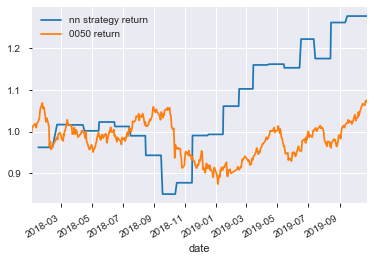

In [24]:
import pandas as pd
rs_legal,l,condition = rs1(68,20,11)
rs_legal = pd.Series(rs, index=dates)

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return':rs_legal.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()



In [25]:
rs_legal[-1]

1.277500492921283

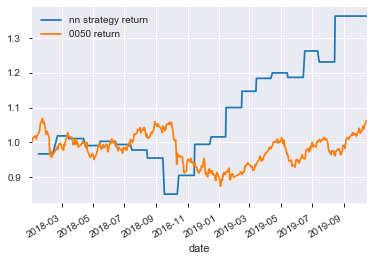

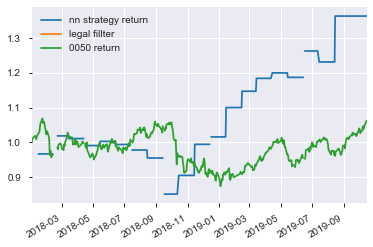

In [25]:
import math
import pandas as pd

dates = sorted(list(set(dataset_test.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_test.loc[d]
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates).cumprod()

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()

rs_legal,l,condition = rs1(68,20,11)
rs_legal = pd.Series(rs, index=dates)

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill') ,'legal fillter':rs_legal , '0050 return':s0050/s0050[0]}).plot()

In [26]:
rs[-1]

1.3630837149577797

In [28]:
rank[l]

TypeError: 'NoneType' object is not iterable

## 剛月持股

In [ ]:
# get the latest dataset

last_date = dataset.index.levels[1].max()
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


# remove NaN testcases

#print("Some stocks are skipped due to NaN")
#print(last_dataset[last_dataset[feature_names].isnull().sum(axis=1) != 0].index.get_level_values("stock_id").values)
last_dataset = last_dataset.dropna(subset=feature_names)

# predict
# calculate score



# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
rank[condition]

In [ ]:
dataset.index.levels[1]

## 結束法人回合

In [ ]:
import numpy as np
import math
import datetime
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

#ret = triple_barrier(close, 1.07, 0.97, 20)

In [ ]:
def br(c):
    adj_open=data.get('開盤價')
    ret = triple_barrier(adj_open[c],1.2,0.95,21)
    return ret

In [ ]:
c = close.unstack()
c = pd.DataFrame(c)
c.index.set_names(["stock_id","date"],inplace=True)
ml.add_profit_prediction(c)

In [ ]:
a = c[0]
s = a["0050"]
ret = triple_barrier(s,1.07,0.97,22)
date = "2019"
ret.triple_barrier_signal[date].plot()

In [ ]:
ret = triple_barrier(s,1.07,0.97,22)
ret

In [ ]:

s = '20190102'

# you could also import date instead of datetime and use that.
def tsf(date,stock):
    date = datetime.datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8]))
    dates = date.strftime("%Y-%m-%d")
    ret = br(stock)
    w=ret.triple_barrier_profit[dates]
    return w
tsf('20190425','0050')

In [ ]:
#w = br("0050")
#w.triple_barrier_profit["2007-04-28"]
import numpy as np
def get_profit(date,stock):
    try:
        date = datetime.datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8]))
        dates = date.strftime("%Y-%m-%d")
        ret = br(stock)
        profit = ret.triple_barrier_profit[date]
        return profit
    except:
        try:
            date=date + datetime.timedelta(days=2)
            dates = date.strftime("%Y-%m-%d")
            ret = br(stock)
            profit = ret.triple_barrier_profit[date]
            return profit
        except:
            pass
        return np.nan

### 當月持股狀況

stock_id  date      
1103      2019-10-15    1.775571
1225      2019-10-15    1.826005
1339      2019-10-15    1.797126
1457      2019-10-15    1.780700
1615      2019-10-15    1.784724
2433      2019-10-15    1.753073
2851      2019-10-15    1.803204
2885      2019-10-15    1.803216
2890      2019-10-15    1.759298
2891      2019-10-15    1.796709
3095      2019-10-15    1.756012
5312      2019-10-15    1.758915
5314      2019-10-15    1.790422
5403      2019-10-15    1.777227
5434      2019-10-15    1.792287
5516      2019-10-15    1.847505
5609      2019-10-15    1.756857
6023      2019-10-15    1.848365
6218      2019-10-15    1.814344
6270      2019-10-15    1.752820
dtype: float64

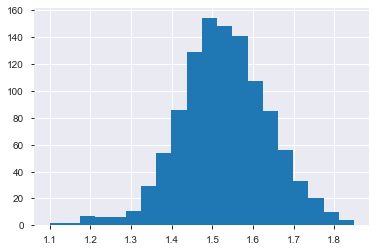

In [37]:
# get the latest dataset

last_date = dataset.index.levels[1].max()
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


# remove NaN testcases

#print("Some stocks are skipped due to NaN")
#print(last_dataset[last_dataset[feature_names].isnull().sum(axis=1) != 0].index.get_level_values("stock_id").values)
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)

# calculate score

rank = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']
condition = (rank >= rank.nlargest(20).iloc[-1]) 

# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
rank[condition]

In [ ]:
rank[l]

In [ ]:
from finlab_old.data import Data
data = Data()
big = data.get('三大法人買賣超股數',10000000)

big = big.fillna(0)
bigm = big.rolling(3).sum()
condition1 = (big - bigm)>3*1000

big.reindex(every_month, method='ffill').unstack()
big = pd.DataFrame(big)
big = big.dropna(how='any')
big = big.reset_index().set_index("date")

## 小結論

In [ ]:
con = pd.DataFrame(condition1.unstack()[rd])
con1 = con.pivot_table(index="stock_id",columns="date")
con0 = con.pivot_table(index="date",columns="stock_id")
con1 = con1[0]
con2 = con1["2012-05-25"]

test = dataset_time.reset_index().set_index("stock_id")
test["return"][rd]
con3 = con2[con2].index
con4 = []
for i in con3:
    con4.append(i)
#con4

#test["return"][con4]#.mean()  #成功選出我們所需要的股票

In [ ]:
con01 = con0.reindex(every_month, method='ffill').dropna()
con02 = con01.loc[d][0]
con03 = con02[con02]

con04=[]
for i in con03.index:
    con04.append(i)
if con04!=[]:
    lo = test["return"][con04]
    print(lo)

In [ ]:
import datetime
from finlab.crawler import date_range
#condition1.unstack()[rd]
d= condition1.unstack()[rd].reset_index().set_index("date")
#d = d['2012-05-10']
#d.reindex(every_month, method='ffill')
#new_m = every_month[87:]
#d.reindex(new_m, method='ffill')
new_m = date_range(datetime.date(2012,5,10),datetime.date(2019,8,3))
d.columns


In [ ]:
def leg(n1,n3):
    condition1 = big.rolling(n1).sum() >n3*1000
    return condition1

In [ ]:
def rs1(n1,n2,n3):
    dates = sorted(list(set(dataset_test.index)))
    rs = []
    for d in dates:
        
        dataset_time = dataset_test.loc[d]
        rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
            
        condition = (rank >= rank.nlargest(n2).iloc[-1]) 
        #r = dataset_time['return'][condition].mean()
            # 開始蝦七八亂改
        rk = dataset_time[condition]['stock_id']
        rd = []
        for n in rk:
            rd.append(n)
    
    #condition1 = big.rolling(n1).sum() >n3*1000
        condition1 = leg(n1,n3)
        con = pd.DataFrame(condition1.unstack()[rd])
    #con1 = con.pivot_table(index="stock_id",columns="date")
        con0 = con.pivot_table(index="date",columns="stock_id")
        con01 = con0.reindex(every_month, method='ffill').dropna()
        con02 = con01.loc[d][0]
        con03 = con02[con02]
        con04=[]
        for i in con03.index:
            con04.append(i)
            
        test = dataset_time.reset_index().set_index("stock_id")
        lo = test["return"][con04].mean()
        #lo = lo.dropna()
        
         #結束蝦七八亂改
        rs.append(lo * (1-3/1000-1.425/1000*2*0.6))
            
    rs = pd.Series(rs, index=dates).cumprod()
    return rs,con04

In [ ]:
rs,l = rs1(68,37,11)
rs = pd.Series(rs, index=dates)

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()

In [ ]:
sorted(rank[l])

In [ ]:
rank[l]